In [2]:
import numpy as np 
import pandas as pd

In [3]:
df= pd.read_csv(r"C:\Users\anush\Downloads\archive\imdb_movies.csv")

In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [7]:
df.dropna(subset=['Overview', 'Genre'], inplace=True)


In [8]:
df['Genre'].value_counts()


Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df['Genre'] = df['Genre'].apply(lambda x: x if isinstance(x, list) else x.split(','))



In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Genre'])
print(mlb.classes_)

[' Action' ' Adventure' ' Biography' ' Comedy' ' Crime' ' Drama' ' Family'
 ' Fantasy' ' Film-Noir' ' History' ' Horror' ' Music' ' Musical'
 ' Mystery' ' Romance' ' Sci-Fi' ' Sport' ' Thriller' ' War' ' Western'
 'Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'Horror' 'Mystery' 'Thriller' 'Western']


In [12]:
genres = [' Action', ' Adventure', ' Biography', ' Comedy', ' Crime', ' Drama', ' Family',
          ' Fantasy', ' Film-Noir', ' History', ' Horror', ' Music', ' Musical',
          ' Mystery', ' Romance', ' Sci-Fi', ' Sport', ' Thriller', ' War', ' Western',
          'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
          'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Mystery', 'Thriller', 'Western']

# Remove any leading or trailing spaces and get unique values
unique_genres = sorted(set(genre.strip() for genre in genres))

# Create the dictionary with encoding
encode_genre = {genre: idx for idx, genre in enumerate(unique_genres)}

print(encode_genre)


{'Action': 0, 'Adventure': 1, 'Animation': 2, 'Biography': 3, 'Comedy': 4, 'Crime': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'Film-Noir': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Musical': 13, 'Mystery': 14, 'Romance': 15, 'Sci-Fi': 16, 'Sport': 17, 'Thriller': 18, 'War': 19, 'Western': 20}


In [13]:
import re
import nltk

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
corpus =[]
ps = PorterStemmer()

In [17]:
df['Overview'][0]

'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

In [18]:
re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Overview'][0]).lower()

'two imprisoned men bond over a number of years  finding solace and eventual redemption through acts of common decency '

In [19]:
for i in range(len(df)):
    overview = re.sub(r'[^a-zA-Z]', ' ', df['Overview'][i])  # Remove non-alphabet characters
    overview = overview.lower()
    words = overview.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    words = [ps.stem(word) for word in words]  # Apply stemming
    corpus.append(" ".join(words))  # Join words back into a sentence


In [20]:
print(corpus[0])


two imprison men bond number year find solac eventu redempt act common decenc


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(corpus).toarray() # Convert text to numerical features


In [23]:
# create the bag of word model
from  sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=1000,ngram_range=(1,2))
X=cv.fit_transform(corpus).toarray()
y=df['Genre'].values


In [24]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert Multi-label Genre to binary format
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)  # Convert to binary array
y_test = mlb.transform(y_test)  # Transform test labels using the same fitted mlb

from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

# Wrap MultinomialNB in MultiOutputClassifier
classifier = MultiOutputClassifier(MultinomialNB(alpha=0.1))
classifier.fit(X_train, y_train)  # Now it should work


c:\Users\anush\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Family'] will be ignored
  warnings.warn(


MultiOutputClassifier(estimator=MultinomialNB(alpha=0.1))

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
from sklearn.metrics import multilabel_confusion_matrix

cm = multilabel_confusion_matrix(y_test, y_pred)
genre_labels = mlb.classes_
print(cm)


[[[194   1]
  [  5   0]]

 [[164  10]
  [ 16  10]]

 [[193   3]
  [  4   0]]

 [[178  10]
  [ 11   1]]

 [[166  14]
  [ 18   2]]

 [[ 72  41]
  [ 44  43]]

 [[186   4]
  [  8   2]]

 [[180   9]
  [ 10   1]]

 [[196   3]
  [  1   0]]

 [[185   3]
  [ 10   2]]

 [[193   3]
  [  3   1]]

 [[186   2]
  [ 11   1]]

 [[192   3]
  [  5   0]]

 [[175   5]
  [ 15   5]]

 [[164   9]
  [ 22   5]]

 [[179   4]
  [ 14   3]]

 [[190   4]
  [  6   0]]

 [[162   8]
  [ 22   8]]

 [[185   5]
  [  6   4]]

 [[193   1]
  [  5   1]]

 [[152  15]
  [ 20  13]]

 [[178   8]
  [ 13   1]]

 [[170  11]
  [ 12   7]]

 [[177   6]
  [ 13   4]]

 [[155  18]
  [ 24   3]]

 [[170   9]
  [ 19   2]]

 [[115  24]
  [ 43  18]]

 [[198   1]
  [  1   0]]

 [[198   1]
  [  1   0]]

 [[196   1]
  [  3   0]]

 [[196   3]
  [  1   0]]

 [[200   0]
  [  0   0]]

 [[198   2]
  [  0   0]]]


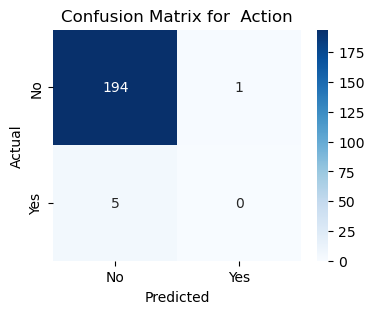

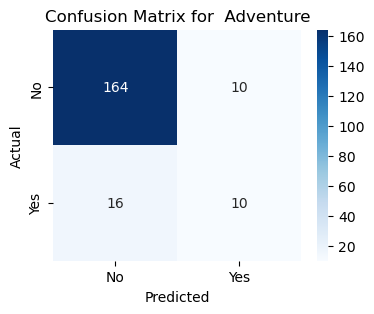

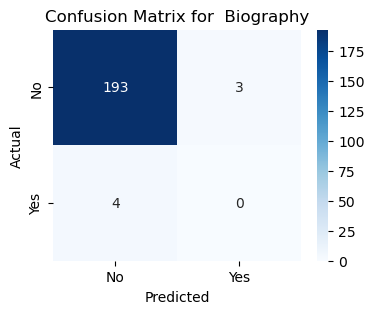

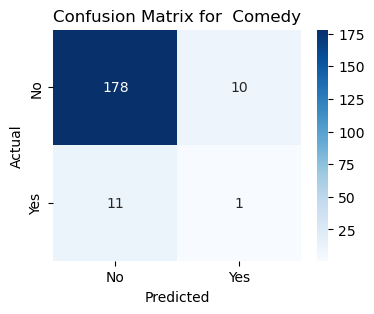

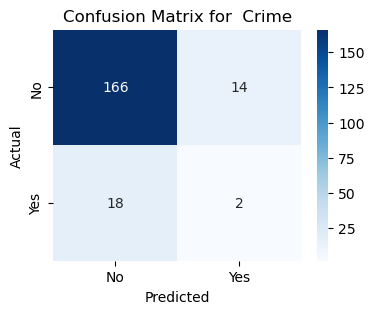

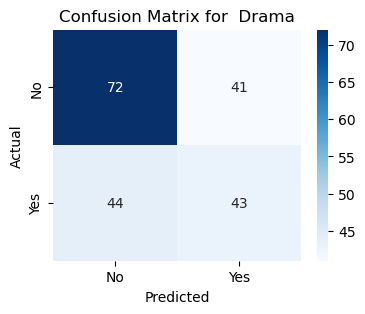

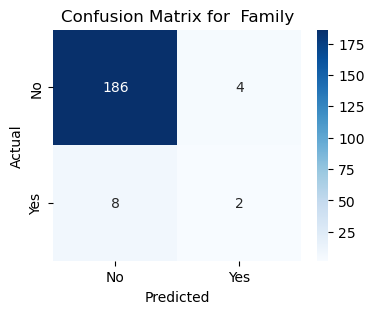

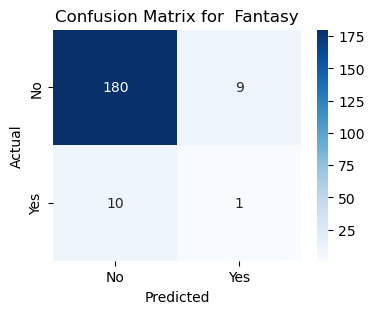

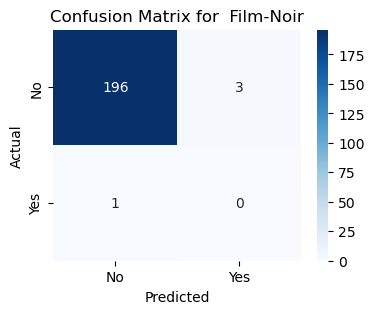

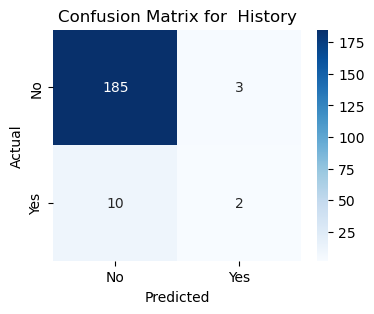

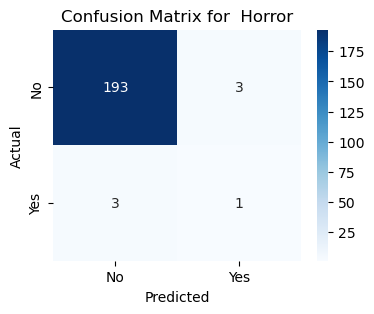

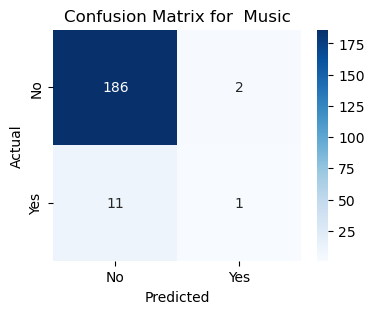

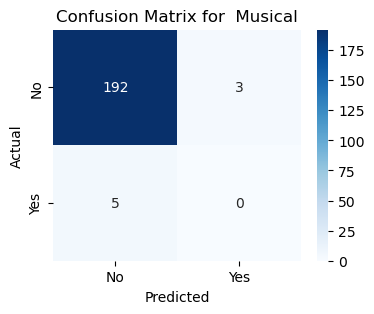

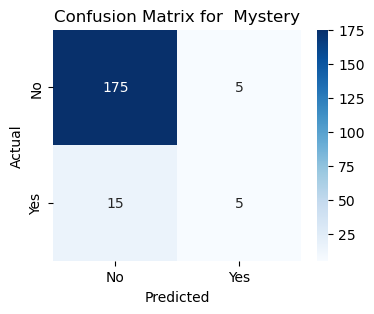

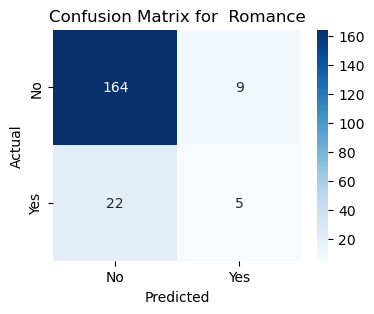

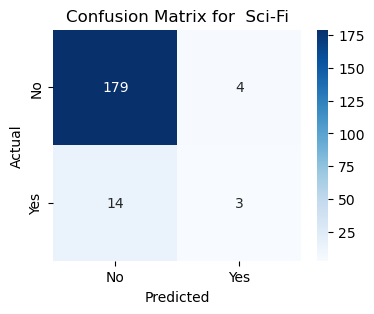

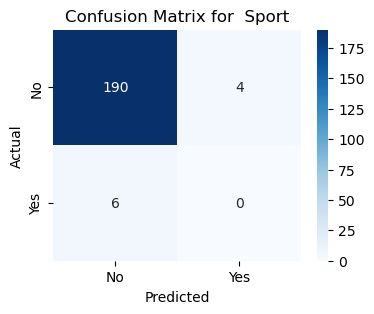

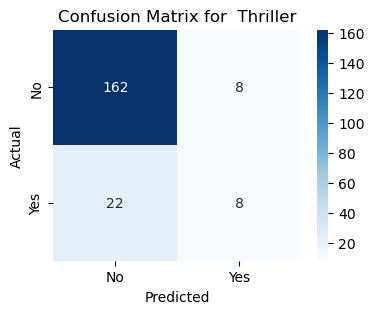

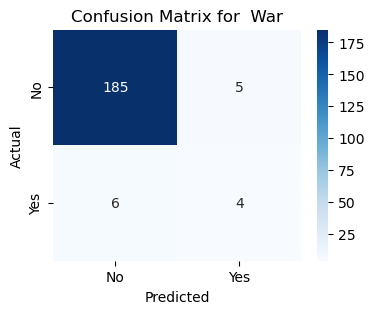

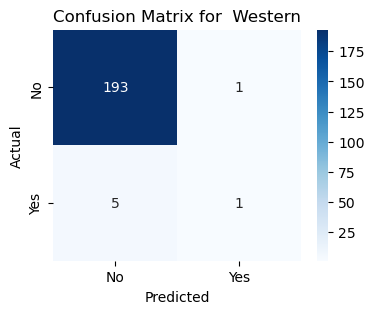

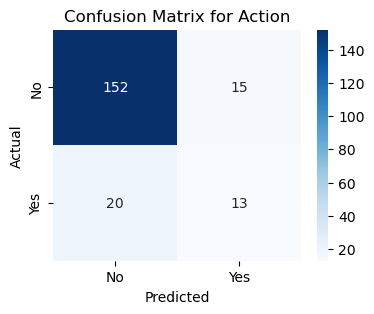

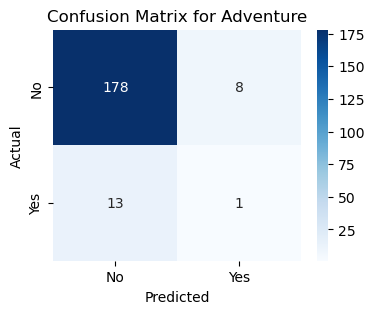

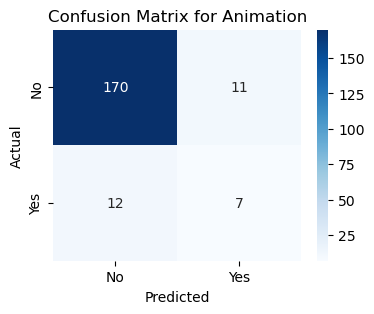

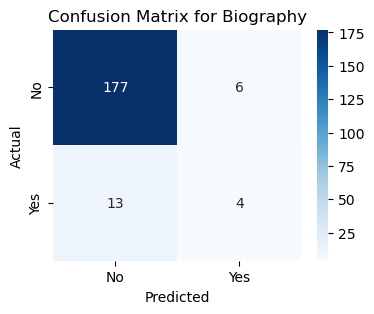

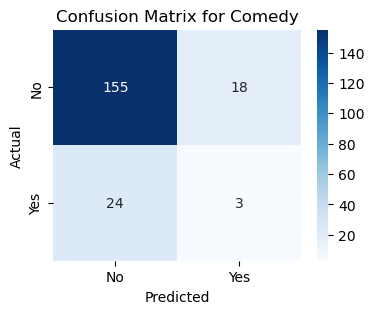

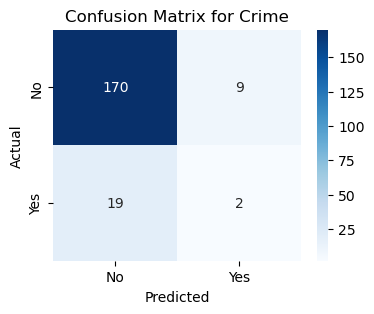

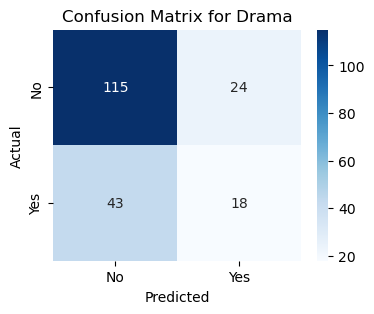

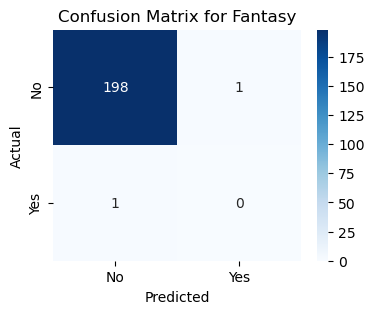

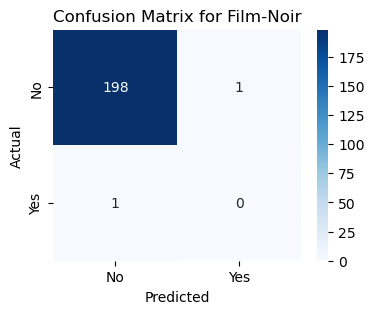

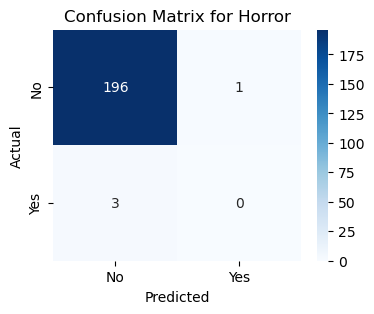

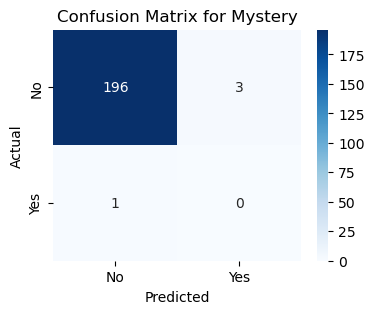

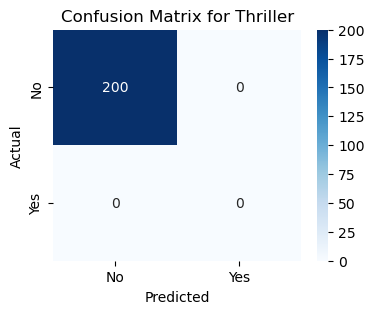

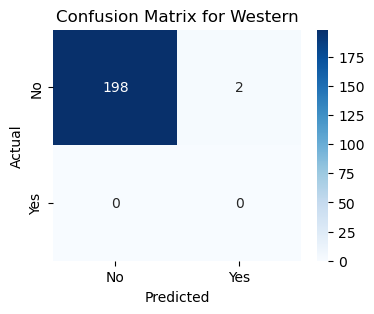

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
 
for i, matrix in enumerate(cm):
    plt.figure(figsize=(4, 3))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {genre_labels[i]}")
    plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.035

In [30]:
import pickle
pickle.dump(cv,open('cv.pkl','wb'))
pickle.dump(classifier,open('model.pkl','wb'))
pickle.dump(mlb, open('mlb.pkl', 'wb'))